# Explore 2 datasets

In [37]:
import pandas as pd
import numpy as np

In [10]:
survey_raw_df = pd.read_csv('survey_results_public.csv')

In [11]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [14]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [16]:
schema_fname = pd.read_csv('survey_results_schema.csv')

In [17]:
schema_fname

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [19]:
schema_raw = pd.read_csv('survey_results_schema.csv', index_col='Column').QuestionText

In [20]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [21]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

# Data Preparation & Cleaning

In [22]:
 selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [23]:
len(selected_columns)

20

In [24]:
survey_df = survey_raw_df[selected_columns].copy()

In [25]:
schema = schema_raw[selected_columns]

In [27]:
survey_df.shape

(64461, 20)

In [28]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
Country                   64072 non-null object
Age                       45446 non-null float64
Gender                    50557 non-null object
EdLevel                   57431 non-null object
UndergradMajor            50995 non-null object
Hobbyist                  64416 non-null object
Age1stCode                57900 non-null object
YearsCode                 57684 non-null object
YearsCodePro              46349 non-null object
LanguageWorkedWith        57378 non-null object
LanguageDesireNextYear    54113 non-null object
NEWLearn                  56156 non-null object
NEWStuck                  54983 non-null object
Employment                63854 non-null object
DevType                   49370 non-null object
WorkWeekHrs               41151 non-null float64
JobSat                    45194 non-null object
JobFactors                49349 non-null object
NEWOvertime              

In [30]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors ='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [31]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


The min and max values of Age seem impossible. So we can simply drop the values that lower than 10 and over 100

In [32]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

The same with WorkWeekHrs, Let's ignore entries where values is higher 140 hours/week (means ~20hours per day)

In [33]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace = True)

Have a look at Gender columns, There are values containing more than just 1 option. So just simply ignore those, keep unique option values

In [35]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [38]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [40]:
survey_df['Gender'].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [43]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
50144,Brazil,NaN,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,18.0,9.0,NaN,C;C++;JavaScript;SQL;TypeScript,NaN,Once every few years,Call a coworker or friend;Visit Stack Overflow...,"Not employed, but looking for work","Developer, full-stack",NaN,NaN,"Languages, frameworks, and other technologies ...",NaN,Not at all important/not necessary
52320,United States,36.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,20.0,15.0,JavaScript,C#;JavaScript;Python;TypeScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Designer;Developer, back-end;Developer, full-s...",40.0,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Sometimes: 1-2 days per month but less than we...,Not at all important/not necessary
37533,India,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,19.0,3.0,NaN,NaN,NaN,NaN,NaN,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Very dissatisfied,NaN,Often: 1-2 days per week or more,Fairly important
56457,Indonesia,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",Yes,NaN,NaN,NaN,C;C#;C++;HTML/CSS;Java;JavaScript;Kotlin;PHP;P...,Python;TypeScript,Once every few years,Play games;Visit Stack Overflow;Do other work ...,NaN,NaN,NaN,NaN,"Languages, frameworks, and other technologies ...",NaN,NaN
27642,United States,60.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,20.0,40.0,37.0,Bash/Shell/PowerShell;Go;HTML/CSS;Java;JavaScr...,PHP,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Data or business analyst;Developer, desktop or...",40.0,Very satisfied,Specific department or team I’d be working on;...,Occasionally: 1-2 days per quarter but less th...,Very important
40292,New Zealand,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
35359,Canada,NaN,NaN,NaN,NaN,Yes,8.0,19.0,NaN,Bash/Shell/PowerShell;C;C++;HTML/CSS;JavaScript,Assembly;Bash/Shell/PowerShell;C;C++;HTML/CSS;...,Every few months,Call a coworker or friend;Go for a walk or oth...,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important
27731,Portugal,51.0,Man,Primary/elementary school,NaN,Yes,16.0,25.0,23.0,Assembly;C;C#;C++;HTML/CSS;Java;JavaScript;SQL,Assembly;C;C#;C++;SQL,Once every few years,Play games;Visit Stack Overflow;Go for a walk ...,Employed full-time,"Developer, desktop or enterprise applications",48.0,Very dissatisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Somewhat important
13354,France,38.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,7.0,31.0,10.0,C;C++;HTML/CSS;Java;JavaScript;PHP;Python;R;SQ...,Go;Python;TypeScript,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, desktop or enterprise applications;...",45.0,Very dissatisfied,Diversity of the company or organization;Remot...,Sometimes: 1-2 days per month but less than we...,Fairly important
20529,China,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,18.0,10.0,4.0,C++;HTML/CSS;JavaScript,C++;HTML/CSS;JavaScript,Once every few years,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, full-stack",45.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Not at all important/not necessary


# Analysis and Visualization

In [44]:
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Country

In [46]:
schema.Country

'Where do you live?'

In [48]:
survey_df.Country.nunique()

183

In [52]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

 We can visualize this using bar chart

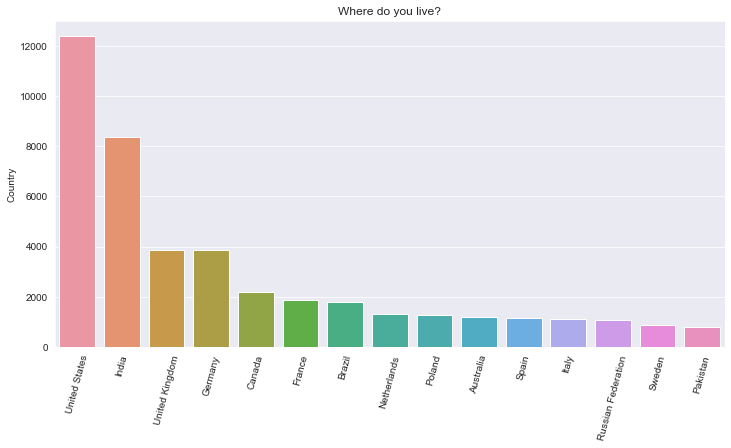

In [54]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries)

From the chart it appears that high number of responders are from US and India.

# Age

The distribution of responders age is also a crucial factor to visualize. We can use histogram to visualize it.

(array([  209.,  2419.,  9135., 11938.,  8739.,  5582.,  3031.,  1756.,
         1038.,   622.,   333.,   143.,    75.]),
 array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]),
 <a list of 13 Patch objects>)

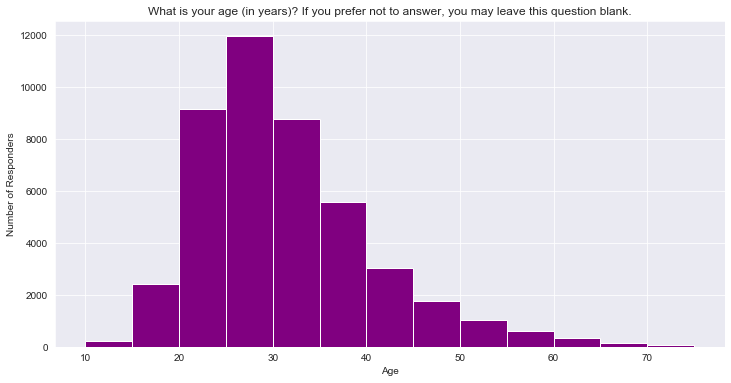

In [58]:
plt.figure(figsize=(12,6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of Responders')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple')

According to the histogram, popular range of Age intotal responders is from 20-40 years old. It proves that many yound people have taken up technology as their career/study fields in the last 20 years

# Gender


In [59]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [60]:
gender_counts = survey_df.Gender.value_counts()
gender_counts


Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

With Gender, using pie chart would be a good way for visualization

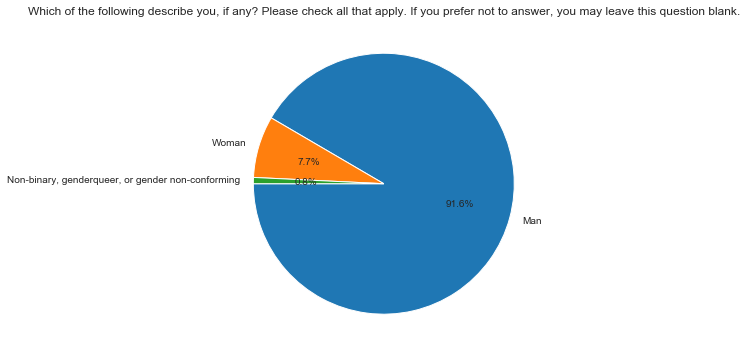

In [63]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

Percentage of Man responders mostly surpass its for woman

# Education Level


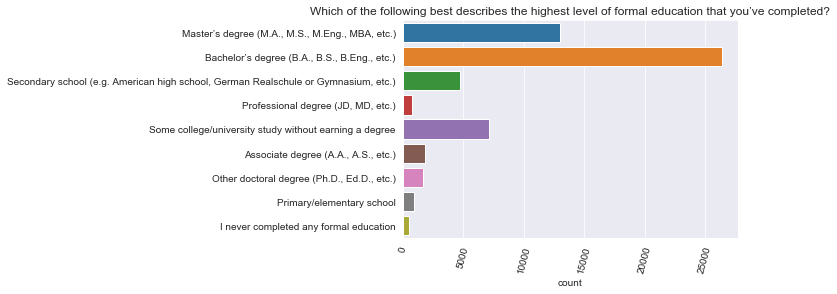

In [67]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

It turns out half of responders come from Bachelor and Master degree, most of programmers seem to have college education. However, it not sure that all of them are from Tech/Computer Science major. Let find out what are those majors?

In [68]:
schema.UndergradMajor

'What was your primary field of study?'

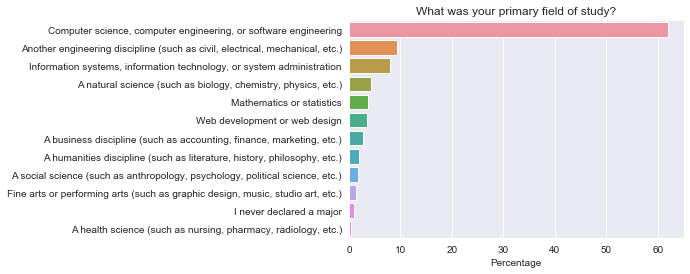

In [69]:
undergrad_pct = survey_df.UndergradMajor.value_counts()*100/survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)
plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

It turns out most of responders holding a college degree other than computer science. It proves that you do not need to pursue a major in computer sciences or relating fileds to be a successful programmer

# Employment


In [70]:
schema.Employment

'Which of the following best describes your current employment status?'

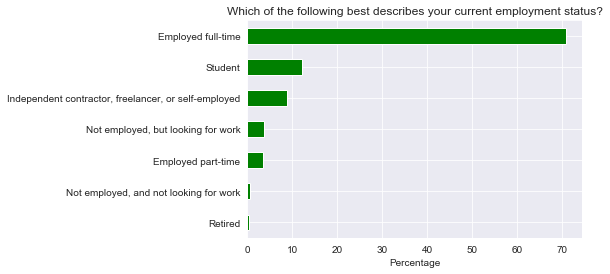

In [85]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

In [72]:
schema.DevType


'Which of the following describe you? Please select all that apply.'

In [73]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                        4396
Developer, back-end                                                                                                                                                                                                                          3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                               2214
Developer, back-end;Developer, full-stack                                                                                                                                                                                                    1465
Developer, front-end            

In [75]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [76]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [77]:
dev_type_df


,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [79]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

# Analysing Questions

### Q: What are the most popular programming languages in 2020?

To answer, we use LanguageWorkWith column - which responders were allowed to choose multiple options

In [86]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [87]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [88]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


There is 25 different laguages that programmers working with

In [91]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False)*100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

We can use bar chart to visualize it

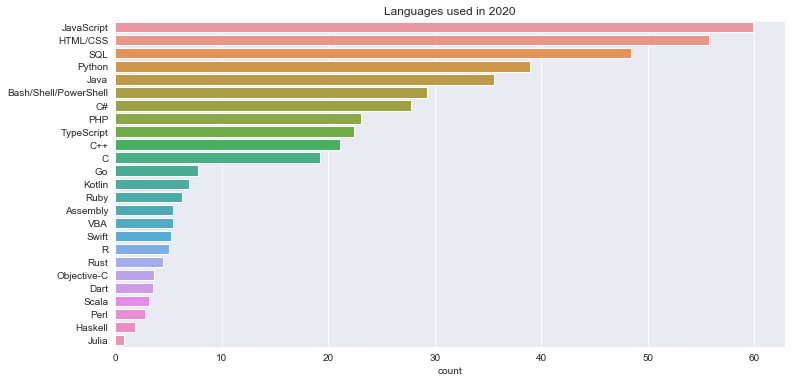

In [95]:
plt.figure(figsize=(12,6))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title('Languages used in 2020')
plt.xlabel('count');

No surprise that JS & HTML/CSS leading the top as web development is one of today's most popular job. Next is SQL and Python - 2 languages in terms of databases and big data, it beats out Java in some web choice

### Q: Which languages are the most people intersted to learn over the next year?

To solve this, we pick LanguagesDesireNextYear column with the same process with previous one.

In [97]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentage = languages_interested_df.mean().sort_values(ascending = False)*100
languages_interested_percentage

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

Text(0.5, 0, 'count')

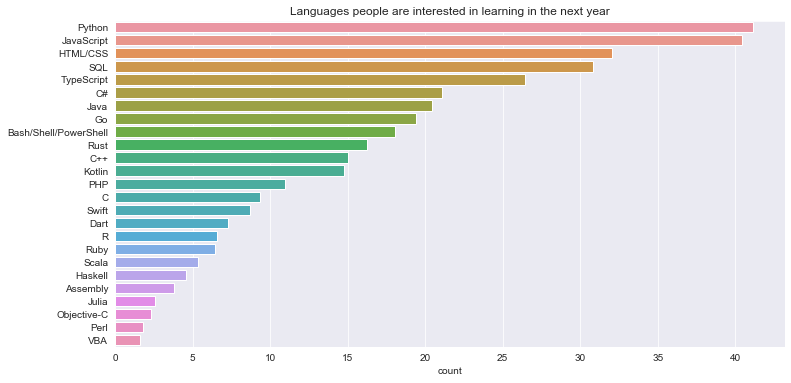

In [98]:
plt.figure(figsize=(12,6))
sns.barplot(x=languages_interested_percentage, y=languages_interested_percentage.index)
plt.title("Languages people are interested in learning in the next year")
plt.xlabel('count')

Python is the langauge most people interested in the next year, the reasons may come from that Python is an easy-to-learn language with suitable for variety of fields: web, data analysis, machine learning,....

# Conclusions

From the analysis we can summary the report:
- Base on the survey responders demographic, wan can infer that most responders come from USA and India whose contry have large population and people working in Tech
- The programming community is diverse in different segments: age, country, gender,...
- Most programmer had their education in Bachelor/Master level, however some cases Tech/Computer Science turn out to be not their major. Whichever background people have canot stop them for building a career or hobby in programming.
- JS, HTML/CSS is widely use in 2020 and even in the very next year, they may continue to stay inside the top because of needs of Web Development.
- Python is the language that people intersted in learning the most as it useful for many fields